In [49]:
# Esse projeto tem como objetivo classificar em grupos frases que contêm descrição de atividades bancárias usando embeddings.

import pandas as pd
import random
from faker import Faker


fake = Faker('pt_BR') # Define a localização para português do Brasil para nomes e datas mais realistas

# Função para gerar descrições únicas com maior complexidade
def gerar_descricao_unica(existentes):
    while True:
        acoes = ["consultar saldo da conta", "realizar transferência bancária", "pagar boleto de conta", "aplicar em investimento de renda fixa",
                 "solicitar empréstimo pessoal", "alterar dados cadastrais como endereço", "emitir segundo extrato do mês", "bloquear cartão de crédito",
                 "consultar extrato detalhado", "realizar depósito em dinheiro", "solicitar cartão adicional", "investir em fundos imobiliários",
                 "cancelar agendamento de pagamento", "renegociar dívida", "ativar conta digital", "cadastrar dispositivo móvel",
                 "solicitar aumento de limite", "baixar aplicativo mobile", "consultar investimentos", "transferir dinheiro internacionalmente"]
        detalhes = ["na conta corrente número {0}".format(fake.random_number(digits=8)),
                    "para outra conta em outro banco", "no valor de R$ {0:.2f}".format(random.uniform(10, 10000)), "com vencimento em {0}".format(fake.date_between(start_date='-1M', end_date='+1M')),
                    "no fundo de renda fixa com código {0}".format(fake.random_number(digits=4)), "com taxa de juros de {0:.2f}% ao mês".format(random.uniform(0.5, 20)),
                    "para atualizar o endereço para {0}".format(fake.street_address()),
                    "devido a perda ou roubo do cartão", "dos últimos {0} dias".format(random.randint(7, 30)), "em espécie no caixa eletrônico",
                    "para o titular {0}".format(fake.name()), "no valor de {0} dólares".format(random.uniform(10,1000)),
                    "agendado para {0}".format(fake.date_between(start_date='today', end_date='+1M'))]

        # Adiciona informações adicionais para aumentar a complexidade
        adicionais = ["", f"utilizando o aplicativo {fake.company()}","com confirmação por SMS", "através do site", "com protocolo de atendimento {0}".format(fake.random_number(digits=10))]

        descricao = f"Cliente {fake.name()} {random.choice(acoes)} {random.choice(detalhes)} {random.choice(adicionais)}."
        if descricao not in existentes:
            existentes.add(descricao)
            return descricao

# Gerar 500 descrições únicas
descricoes_unicas = set()
dados = [gerar_descricao_unica(descricoes_unicas) for _ in range(500)]

# Criar DataFrame
df = pd.DataFrame(dados, columns=["Descrição"])

# Verificar unicidade
if df['Descrição'].nunique() == len(df):
    print("Todos os casos são únicos!")
else:
    print("Há descrições duplicadas.")

# Exibir as primeiras 5 linhas
print(df.head())


Todos os casos são únicos!
                                           Descrição
0  Cliente Srta. Ana Vitória Novaes bloquear cart...
1  Cliente Maria Julia Viana aplicar em investime...
2  Cliente Davi Lucca Machado cancelar agendament...
3  Cliente Sr. Dante Camargo realizar transferênc...
4  Cliente Rafaela Caldeira ativar conta digital ...


In [50]:
df_modelo_filtrado = df

In [51]:
df = df_modelo_filtrado['Descrição'].to_list()

In [52]:
df

['Cliente Srta. Ana Vitória Novaes bloquear cartão de crédito no fundo de renda fixa com código 4047 com confirmação por SMS.',
 'Cliente Maria Julia Viana aplicar em investimento de renda fixa com taxa de juros de 2.07% ao mês .',
 'Cliente Davi Lucca Machado cancelar agendamento de pagamento no valor de 948.0947763887845 dólares com confirmação por SMS.',
 'Cliente Sr. Dante Camargo realizar transferência bancária para atualizar o endereço para Avenida de Albuquerque, 896 utilizando o aplicativo Sampaio - EI.',
 'Cliente Rafaela Caldeira ativar conta digital dos últimos 8 dias .',
 'Cliente Sra. Brenda Vasconcelos consultar extrato detalhado para atualizar o endereço para Parque Moura .',
 'Cliente Calebe Cunha solicitar cartão adicional para o titular Raul Pires .',
 'Cliente Ana Liz Macedo cancelar agendamento de pagamento agendado para 2025-02-17 com protocolo de atendimento 7357159635.',
 'Cliente Ana Julia Cavalcanti consultar saldo da conta para o titular Enrico Fogaça .',
 'Cl

In [53]:
# criando embeddings
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df)

print(embeddings)

[[-8.6586170e-02  1.2286753e-02 -2.2287831e-02 ... -8.9533869e-03
  -2.4351394e-02 -9.0437770e-02]
 [-2.1987345e-02  3.7956152e-02 -2.5643870e-02 ... -2.6281239e-02
  -2.7416343e-02 -3.7082329e-02]
 [-6.3439436e-02  7.7459306e-02 -6.1166245e-03 ...  2.6030188e-02
  -3.4946755e-02 -7.3445320e-02]
 ...
 [ 2.2452589e-02  9.9501185e-02 -1.0242086e-02 ...  3.5503995e-02
  -6.0998097e-02 -1.7409703e-02]
 [-9.1496341e-02  8.1709921e-02 -6.1627924e-02 ...  4.3009512e-02
   5.6654770e-02  1.8480010e-02]
 [-7.4704766e-02  2.5851546e-02 -1.1715404e-01 ...  5.8814242e-02
  -1.0224949e-04 -7.8379400e-03]]


In [54]:
embeddings.shape

(500, 384)

In [55]:
print(embeddings)

[[-8.6586170e-02  1.2286753e-02 -2.2287831e-02 ... -8.9533869e-03
  -2.4351394e-02 -9.0437770e-02]
 [-2.1987345e-02  3.7956152e-02 -2.5643870e-02 ... -2.6281239e-02
  -2.7416343e-02 -3.7082329e-02]
 [-6.3439436e-02  7.7459306e-02 -6.1166245e-03 ...  2.6030188e-02
  -3.4946755e-02 -7.3445320e-02]
 ...
 [ 2.2452589e-02  9.9501185e-02 -1.0242086e-02 ...  3.5503995e-02
  -6.0998097e-02 -1.7409703e-02]
 [-9.1496341e-02  8.1709921e-02 -6.1627924e-02 ...  4.3009512e-02
   5.6654770e-02  1.8480010e-02]
 [-7.4704766e-02  2.5851546e-02 -1.1715404e-01 ...  5.8814242e-02
  -1.0224949e-04 -7.8379400e-03]]


In [56]:
# Converter embeddings para DataFrame
# Cada embedding é um vetor de 384 dimensões (tamanho do modelo all-MiniLM-L6-v2)
df_embeddings = pd.DataFrame(embeddings)

# Adicionar uma coluna com as frases originais
df_embeddings.insert(0, "Texto", df_modelo_filtrado['Descrição'])

# Exibir o DataFrame
print(df_embeddings.head())

                                               Texto         0         1  \
0  Cliente Srta. Ana Vitória Novaes bloquear cart... -0.086586  0.012287   
1  Cliente Maria Julia Viana aplicar em investime... -0.021987  0.037956   
2  Cliente Davi Lucca Machado cancelar agendament... -0.063439  0.077459   
3  Cliente Sr. Dante Camargo realizar transferênc... -0.019236  0.040858   
4  Cliente Rafaela Caldeira ativar conta digital ... -0.055648  0.057970   

          2         3         4         5         6         7         8  ...  \
0 -0.022288 -0.002881 -0.124065 -0.004930  0.007255  0.070228  0.033249  ...   
1 -0.025644 -0.018296 -0.095745  0.041287  0.023679  0.150037  0.042998  ...   
2 -0.006117 -0.029202 -0.073059  0.013848  0.031539  0.019177  0.063653  ...   
3 -0.114194 -0.000039 -0.092885 -0.014512 -0.032598  0.057335 -0.019066  ...   
4 -0.086768 -0.066406 -0.120640 -0.028060 -0.008047  0.108219  0.042570  ...   

        374       375       376       377       378       379 

In [57]:
df_embeddings

,Texto,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,Cliente Srta. Ana Vitória Novaes bloquear cart...,-0.086586,0.012287,-0.022288,-0.002881,-0.124065,-0.004930,0.007255,0.070228,0.033249,...,-0.021292,-0.071569,0.077909,0.025131,0.026057,-0.018438,0.125820,-0.008953,-0.024351,-0.090438
1,Cliente Maria Julia Viana aplicar em investime...,-0.021987,0.037956,-0.025644,-0.018296,-0.095745,0.041287,0.023679,0.150037,0.042998,...,-0.047737,0.032749,0.006499,0.022773,-0.031847,-0.009646,0.055358,-0.026281,-0.027416,-0.037082
2,Cliente Davi Lucca Machado cancelar agendament...,-0.063439,0.077459,-0.006117,-0.029202,-0.073059,0.013848,0.031539,0.019177,0.063653,...,-0.065114,-0.053625,0.029941,0.022544,-0.025726,0.047900,0.097189,0.026030,-0.034947,-0.073445
3,Cliente Sr. Dante Camargo realizar transferênc...,-0.019236,0.040858,-0.114194,-0.000039,-0.092885,-0.014512,-0.032598,0.057335,-0.019066,...,0.026404,-0.033208,0.021267,-0.008578,-0.049296,0.045169,0.051286,0.063179,-0.030234,-0.055001
4,Cliente Rafaela Caldeira ativar conta digital ...,-0.055648,0.057970,-0.086768,-0.066406,-0.120640,-0.028060,-0.008047,0.108219,0.042570,...,-0.037544,-0.081254,0.048001,-0.001038,-0.030512,0.078468,0.019630,0.019336,-0.026942,-0.065658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Cliente Matteo Montenegro consultar investimen...,-0.060212,0.041328,-0.064084,-0.012424,-0.087830,-0.008350,0.028795,0.134529,-0.000759,...,-0.041857,-0.002917,0.048862,0.012674,0.020962,0.013030,-0.001390,-0.044602,-0.029815,-0.042923
496,Cliente Srta. Maria Luísa Souza realizar trans...,-0.069946,0.007091,-0.084462,-0.021289,-0.104357,0.032503,0.027261,0.095073,0.051196,...,-0.021957,-0.063321,0.002268,0.060386,-0.010036,0.079685,0.091199,0.048721,0.007593,-0.101692
497,Cliente Rodrigo da Mata cancelar agendamento d...,0.022453,0.099501,-0.010242,-0.001308,-0.049883,-0.007480,-0.037349,-0.002430,0.038770,...,0.014294,-0.016638,0.060818,0.011323,-0.060348,0.039255,0.060027,0.035504,-0.060998,-0.017410
498,Cliente Dr. Josué Aparecida baixar aplicativo ...,-0.091496,0.081710,-0.061628,-0.112567,-0.123467,-0.026368,-0.001117,0.081822,0.049156,...,-0.074523,-0.059491,0.017366,-0.069854,0.023458,0.002581,0.032164,0.043010,0.056655,0.018480


In [58]:

from sklearn.cluster import KMeans

# Remove a coluna de descrição
df_embeddings_sem_descricao = df_embeddings.drop(columns=["Texto"])

# Define o número de clusters desejado (ajuste conforme necessário)
num_clusters = 5

# Cria e treina o modelo KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
kmeans.fit(df_embeddings_sem_descricao)

# Obtém os rótulos de cluster para cada ponto de dados
labels = kmeans.labels_

# Adiciona os rótulos de cluster ao DataFrame original
df_embeddings['Cluster'] = labels

# Exibe o DataFrame com os rótulos de cluster
print(df_embeddings.head())


                                               Texto         0         1  \
0  Cliente Srta. Ana Vitória Novaes bloquear cart... -0.086586  0.012287   
1  Cliente Maria Julia Viana aplicar em investime... -0.021987  0.037956   
2  Cliente Davi Lucca Machado cancelar agendament... -0.063439  0.077459   
3  Cliente Sr. Dante Camargo realizar transferênc... -0.019236  0.040858   
4  Cliente Rafaela Caldeira ativar conta digital ... -0.055648  0.057970   

          2         3         4         5         6         7         8  ...  \
0 -0.022288 -0.002881 -0.124065 -0.004930  0.007255  0.070228  0.033249  ...   
1 -0.025644 -0.018296 -0.095745  0.041287  0.023679  0.150037  0.042998  ...   
2 -0.006117 -0.029202 -0.073059  0.013848  0.031539  0.019177  0.063653  ...   
3 -0.114194 -0.000039 -0.092885 -0.014512 -0.032598  0.057335 -0.019066  ...   
4 -0.086768 -0.066406 -0.120640 -0.028060 -0.008047  0.108219  0.042570  ...   

        375       376       377       378       379       380 

In [59]:
from sklearn.metrics import silhouette_score

# Calcula a pontuação da silhueta
silhouette_avg = silhouette_score(df_embeddings_sem_descricao, labels)
print(f"A pontuação da silhueta para o modelo KMeans com {num_clusters} clusters é: {silhouette_avg}")


A pontuação da silhueta para o modelo KMeans com 5 clusters é: 0.08514291048049927


In [ ]:
# Avaliando diferentes valores de k com Silhouette Score

range_n_clusters = range(2, 100)  # Testando k de 2 a 10
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(df_embeddings_sem_descricao)
    silhouette_avg = silhouette_score(df_embeddings_sem_descricao, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, a pontuação da silhueta é {silhouette_avg}")

# Plotando os resultados
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Pontuação da Silhueta")
plt.title("Avaliando o número ideal de clusters")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Encontrando o melhor k
best_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"O melhor valor de k (com base na pontuação da silhueta) é: {best_k}")


In [69]:


import pandas as pd


num_clusters = 15

kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
kmeans.fit(df_embeddings_sem_descricao)

# Adicione os rótulos de cluster ao DataFrame
df_embeddings['Cluster'] = kmeans.labels_

# Salve o DataFrame com os clusters em um arquivo CSV
df_embeddings.to_csv('resultados_modelo_15_clusters.csv', index=False)

print(f"Resultados salvos em 'resultados_modelo_15_clusters.csv'")


Resultados salvos em 'resultados_modelo_15_clusters.csv'


Resultados com redução de dimensionalidade salvos em 'resultados_com_reducao_dimensionalidade.csv'


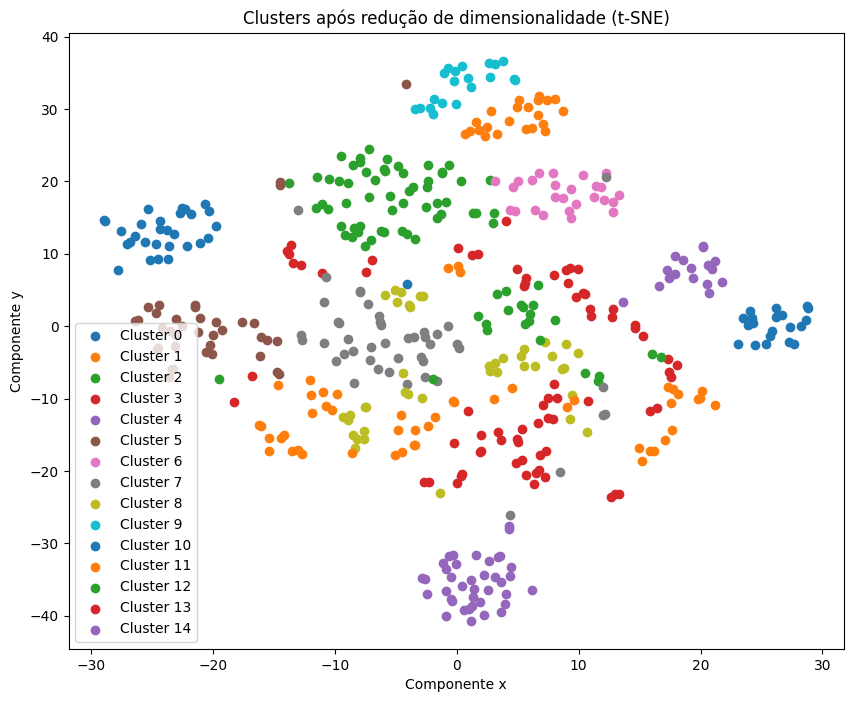

In [68]:

import matplotlib.pyplot as plt

num_clusters = best_k # Use o melhor k encontrado


kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
kmeans.fit(df_embeddings_sem_descricao)

# Adicione os rótulos de cluster ao DataFrame
df_embeddings['Cluster'] = kmeans.labels_

# Redução de Dimensionalidade (t-SNE) para visualização
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)  # Projeta para 2 dimensões
embeddings_2d = tsne.fit_transform(df_embeddings_sem_descricao)

# Adiciona as coordenadas 2D ao DataFrame
df_embeddings['x'] = embeddings_2d[:, 0]
df_embeddings['y'] = embeddings_2d[:, 1]

df_embeddings.to_csv('resultados_com_reducao_dimensionalidade.csv', index=False)

print(f"Resultados com redução de dimensionalidade salvos em 'resultados_com_reducao_dimensionalidade.csv'")

# Plot dos clusters com redução de dimensionalidade
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    plt.scatter(df_embeddings[df_embeddings['Cluster'] == cluster]['x'],
                df_embeddings[df_embeddings['Cluster'] == cluster]['y'],
                label=f'Cluster {cluster}')
plt.legend()
plt.title('Clusters após redução de dimensionalidade (t-SNE)')
plt.xlabel('Componente x')
plt.ylabel('Componente y')
plt.show()
